In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
df = pd.read_csv('nyc_tripdata.csv',nrows=1000000)

In [5]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,40.759109,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,40.824413,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,40.719986,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,40.742653,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30


In [6]:
df.shape

(1000000, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1000000 non-null  int64  
 1   tpep_pickup_datetime   1000000 non-null  object 
 2   tpep_dropoff_datetime  1000000 non-null  object 
 3   passenger_count        1000000 non-null  int64  
 4   trip_distance          1000000 non-null  float64
 5   pickup_longitude       1000000 non-null  float64
 6   pickup_latitude        1000000 non-null  float64
 7   RateCodeID             1000000 non-null  int64  
 8   store_and_fwd_flag     1000000 non-null  object 
 9   dropoff_longitude      1000000 non-null  float64
 10  dropoff_latitude       1000000 non-null  float64
 11  payment_type           1000000 non-null  int64  
 12  fare_amount            1000000 non-null  float64
 13  extra                  1000000 non-null  float64
 14  mta_tax            

# DATA CLEANING

In [ ]:
#1:Removing irrelevant columns
df.columns = [col.strip() for col in df.columns] 
df.drop(columns=['store_and_fwd_flag'], inplace=True, errors='ignore')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1000000 non-null  int64  
 1   tpep_pickup_datetime   1000000 non-null  object 
 2   tpep_dropoff_datetime  1000000 non-null  object 
 3   passenger_count        1000000 non-null  int64  
 4   trip_distance          1000000 non-null  float64
 5   pickup_longitude       1000000 non-null  float64
 6   pickup_latitude        1000000 non-null  float64
 7   RateCodeID             1000000 non-null  int64  
 8   dropoff_longitude      1000000 non-null  float64
 9   dropoff_latitude       1000000 non-null  float64
 10  payment_type           1000000 non-null  int64  
 11  fare_amount            1000000 non-null  float64
 12  extra                  1000000 non-null  float64
 13  mta_tax                1000000 non-null  float64
 14  tip_amount         

In [10]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RateCodeID', 'dropoff_longitude',
       'dropoff_latitude', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')

In [11]:
#2.Remove duplicates the values
df = df.drop_duplicates()

In [12]:
#3.Handle missing values
df = df.dropna()

In [13]:
#4.Convert datetime column
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

In [14]:
#5.Remove trips with zero or negative distances
df = df[df['trip_distance'] > 0]

In [15]:
#6.Remove negative or zero fares
df = df[df['fare_amount'] > 0]

In [16]:
#7.Filter unrealistic trip durations
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], errors='coerce')
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds()
df = df[(df['trip_duration'] > 30) & (df['trip_duration'] < 7200)]

In [17]:
#8.Remove outliers using IQR
Q1 = df[['trip_distance', 'fare_amount', 'trip_duration']].quantile(0.25)
Q3 = df[['trip_distance', 'fare_amount', 'trip_duration']].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[
    (df['trip_distance'] >= lower_bound['trip_distance']) & 
    (df['trip_distance'] <= upper_bound['trip_distance']) &
    (df['fare_amount'] >= lower_bound['fare_amount']) & 
    (df['fare_amount'] <= upper_bound['fare_amount']) &
    (df['trip_duration'] >= lower_bound['trip_duration']) & 
    (df['trip_duration'] <= upper_bound['trip_duration'])
]


In [18]:
#9.Filter incorrect geolocation data
NYC_BOUNDS = {'lat_min': 40.5, 'lat_max': 41.2, 'lon_min': -74.3, 'lon_max': -73.7}
df = df[(df['pickup_latitude'].between(NYC_BOUNDS['lat_min'], NYC_BOUNDS['lat_max'])) &
        (df['pickup_longitude'].between(NYC_BOUNDS['lon_min'], NYC_BOUNDS['lon_max'])) &
        (df['dropoff_latitude'].between(NYC_BOUNDS['lat_min'], NYC_BOUNDS['lat_max'])) &
        (df['dropoff_longitude'].between(NYC_BOUNDS['lon_min'], NYC_BOUNDS['lon_max']))]

In [19]:
#10.Ensure data types are correct
df['passenger_count'] = df['passenger_count'].astype(int)

In [20]:
#11.Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# EXPLORATORY DATA ANALYSIS(EDA)


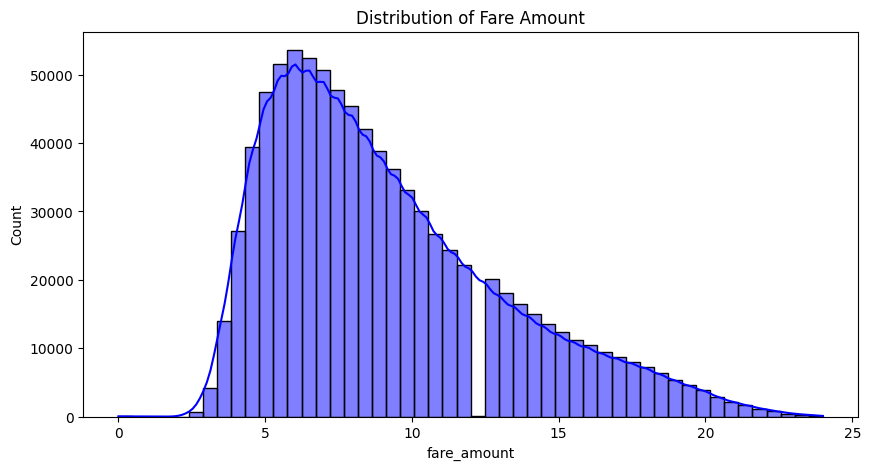

In [21]:
#1.
plt.figure(figsize=(10,5))
sns.histplot(df['fare_amount'], bins=50, kde=True, color='blue')
plt.title('Distribution of Fare Amount')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_14456\362694941.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = df.groupby('distance_bin').agg({'fare_amount': 'mean'}).reset_index()
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\categorical.py:595: RuntimeWarning: invalid value encountered in cast
  np.array(self.categories._na_value).astype(dtype)


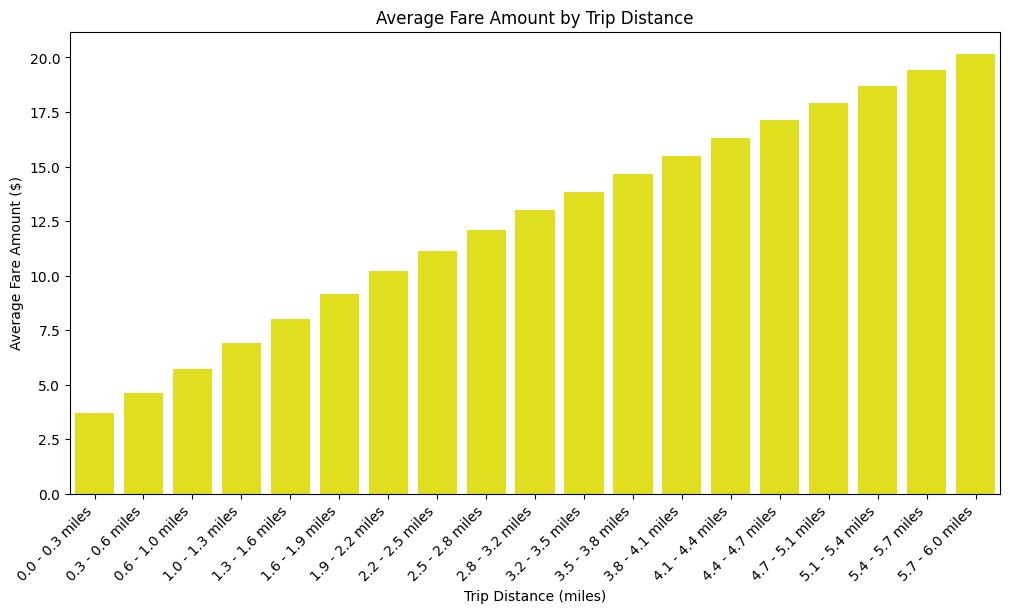

In [ ]:
#2.
distance_bins = np.linspace(df['trip_distance'].min(), df['trip_distance'].max(), 20)
df['distance_bin'] = pd.cut(df['trip_distance'], bins=distance_bins)
agg_df = df.groupby('distance_bin').agg({'fare_amount': 'mean'}).reset_index()
agg_df['distance_bin'] = agg_df['distance_bin'].apply(lambda x: f"{x.left:.1f} - {x.right:.1f} miles")
plt.figure(figsize=(12, 6))
sns.barplot(x=agg_df['distance_bin'], y=agg_df['fare_amount'], color='yellow')
plt.title('Average Fare Amount by Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Average Fare Amount ($)')
plt.xticks(rotation=45, ha='right') 
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_14456\2887165349.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['hour'], palette='viridis')


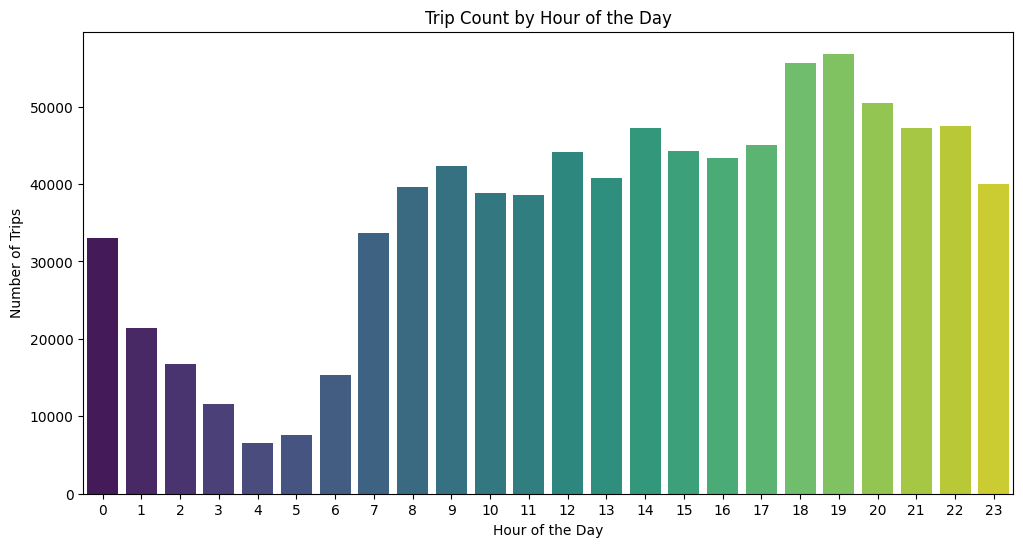

In [23]:
#3.
plt.figure(figsize=(12,6))
df['hour'] = df['tpep_pickup_datetime'].dt.hour
sns.countplot(x=df['hour'], palette='viridis')
plt.title('Trip Count by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_14456\1221725808.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['passenger_count'], y=df['fare_amount'], palette='magma')


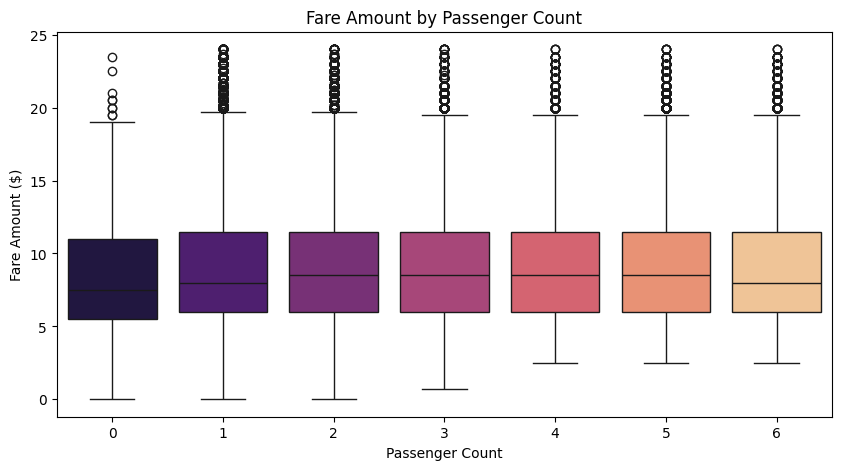

In [24]:
#4.
plt.figure(figsize=(10,5))
sns.boxplot(x=df['passenger_count'], y=df['fare_amount'], palette='magma')
plt.title('Fare Amount by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.show()

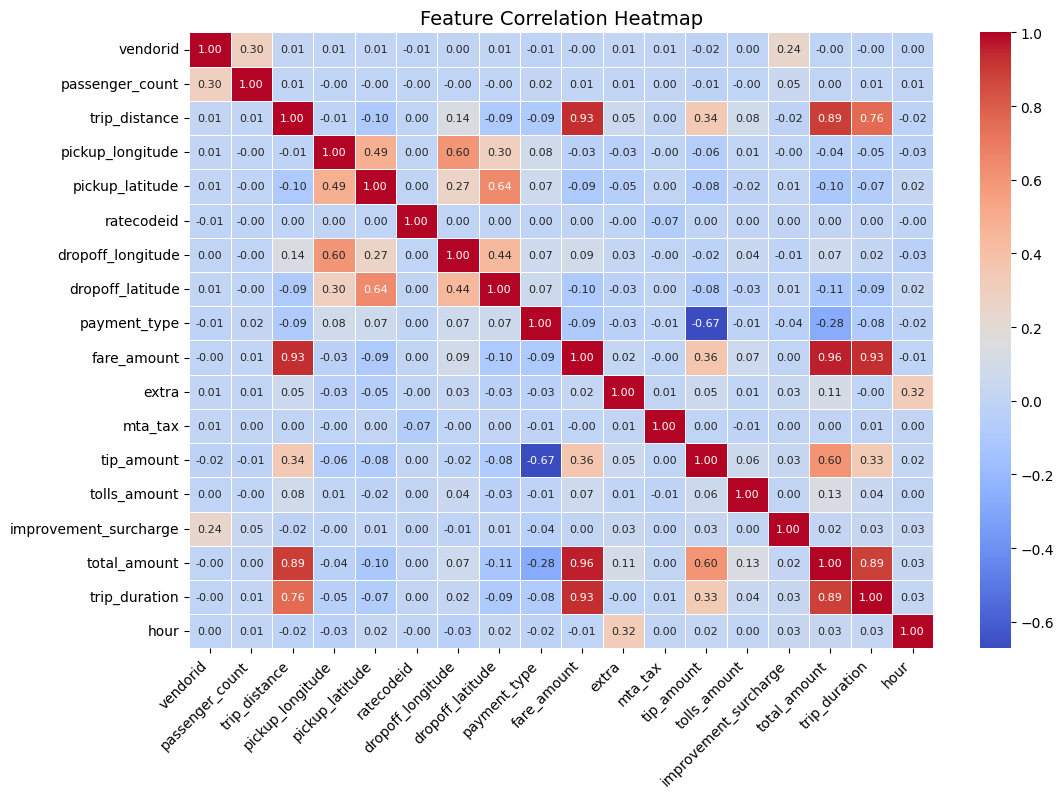

In [ ]:
#5.
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8)) 
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.yticks(fontsize=10) 
plt.title('Feature Correlation Heatmap', fontsize=14)
plt.show()

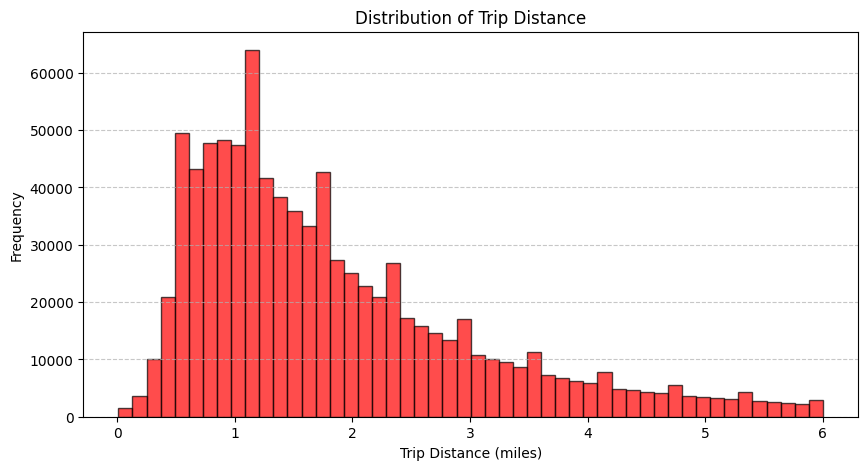

In [26]:
#6.
plt.figure(figsize=(10, 5))
plt.hist(df['trip_distance'], bins=50, color='red', alpha=0.7, edgecolor='black')
plt.title('Distribution of Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_14456\734216297.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df['hour'], y=df['fare_amount'], estimator=np.mean, ci=None, marker='o', color='black')


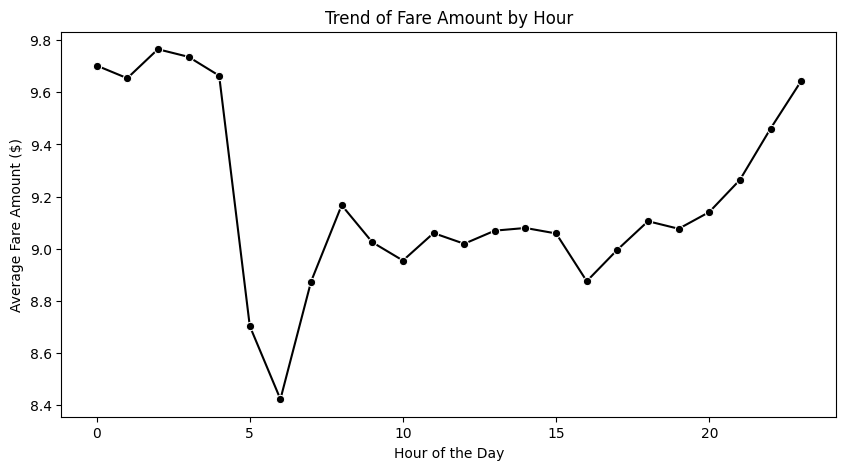

In [27]:
#7.
plt.figure(figsize=(10, 5))
sns.lineplot(x=df['hour'], y=df['fare_amount'], estimator=np.mean, ci=None, marker='o', color='black')
plt.title('Trend of Fare Amount by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare Amount ($)')
plt.show()

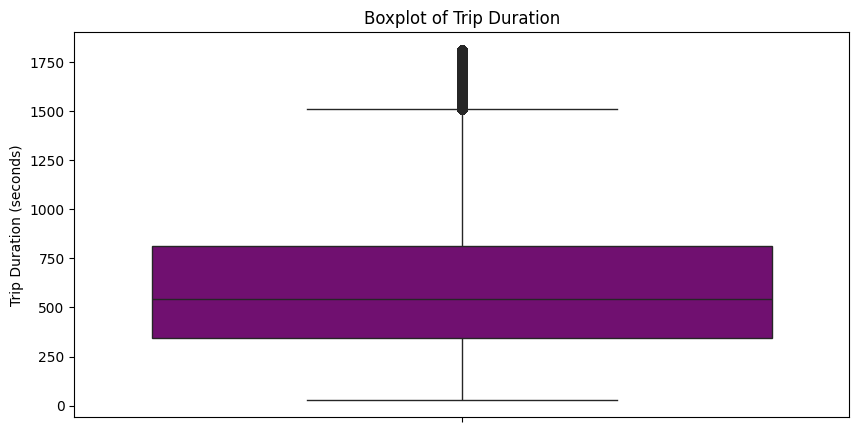

In [28]:
#8.
plt.figure(figsize=(10,5))
sns.boxplot(y=df['trip_duration'], color='purple')
plt.title('Boxplot of Trip Duration')
plt.ylabel('Trip Duration (seconds)')
plt.show()

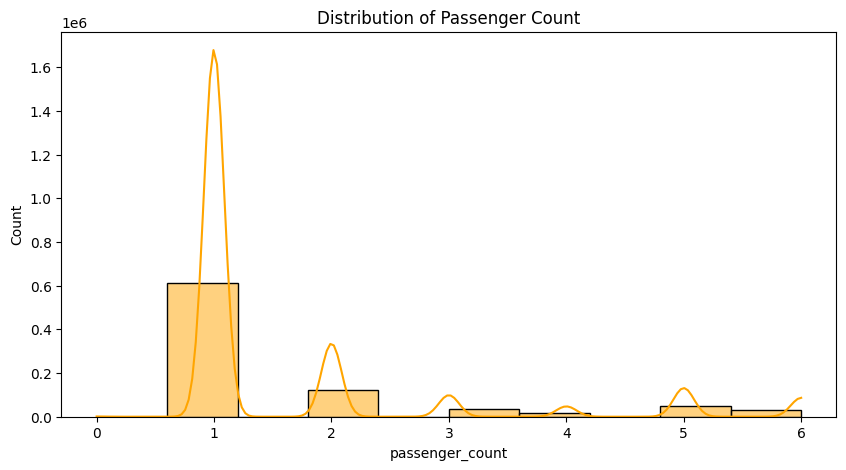

In [29]:
#9.
plt.figure(figsize=(10,5))
sns.histplot(df['passenger_count'], bins=10, kde=True, color='orange')
plt.title('Distribution of Passenger Count')
plt.show()

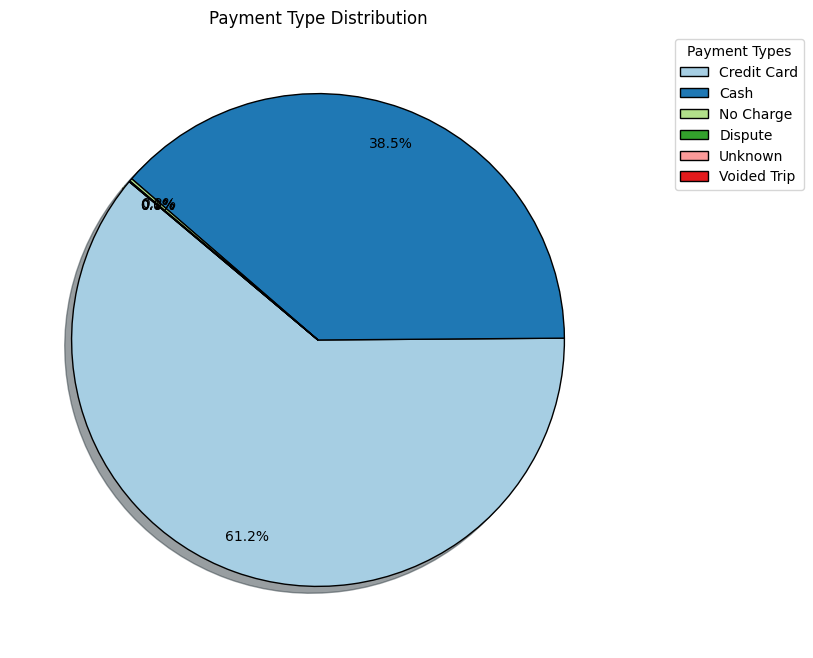

In [30]:
#10.
payment_labels = {
    1: 'Credit Card', 
    2: 'Cash', 
    3: 'No Charge', 
    4: 'Dispute', 
    5: 'Unknown', 
    6: 'Voided Trip'
}
payment_counts = df['payment_type'].value_counts().reindex(payment_labels.keys(), fill_value=0)
labels = [payment_labels.get(i, i) for i in payment_counts.index]
plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(
    payment_counts, 
    autopct='%1.1f%%', 
    startangle=140, 
    wedgeprops={'edgecolor': 'black'}, 
    colors=plt.cm.Paired.colors, 
    pctdistance=0.85, 
    shadow=True
)
plt.legend(wedges, labels, title="Payment Types", loc="upper right", bbox_to_anchor=(1.3, 1))
plt.title('Payment Type Distribution')
plt.ylabel('')  
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_14456\3971753518.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_duration = df.groupby('distance_bin')['trip_duration'].mean()


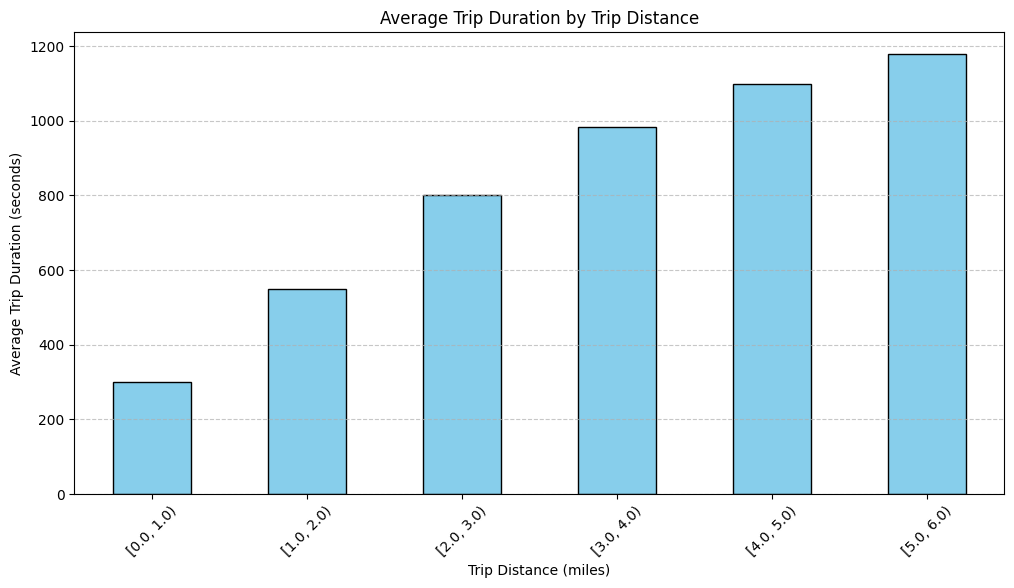

In [ ]:
#11.
bins = np.arange(0, df['trip_distance'].max() + 1, 1)  # Bin every 1 mile
df['distance_bin'] = pd.cut(df['trip_distance'], bins, right=False)
avg_duration = df.groupby('distance_bin')['trip_duration'].mean()
plt.figure(figsize=(12,6))
avg_duration.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Trip Duration by Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Average Trip Duration (seconds)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


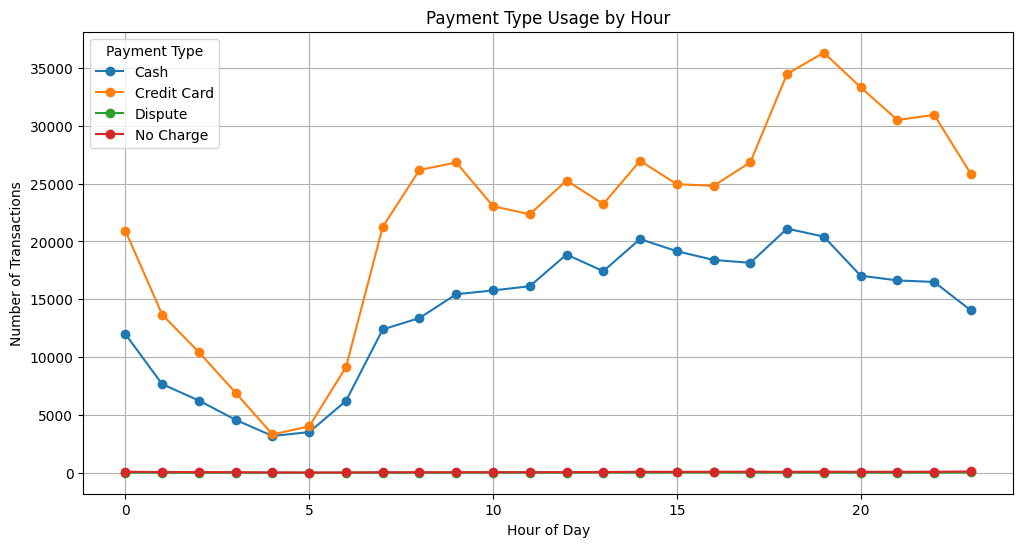

In [32]:
#12.
payment_type_map = {1: 'Credit Card',2: 'Cash',3: 'No Charge',4: 'Dispute'}
df['payment_type'] = df['payment_type'].map(payment_type_map)
payment_type_counts = df.groupby(['hour', 'payment_type']).size().unstack()
ax = payment_type_counts.plot(kind='line', marker='o', figsize=(12,6))
payment_type_labels = payment_type_counts.columns.tolist()
ax.legend(title='Payment Type', labels=payment_type_labels)

plt.title('Payment Type Usage by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_14456\3654369081.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['payment_type'], y=df['fare_amount'], palette='coolwarm')


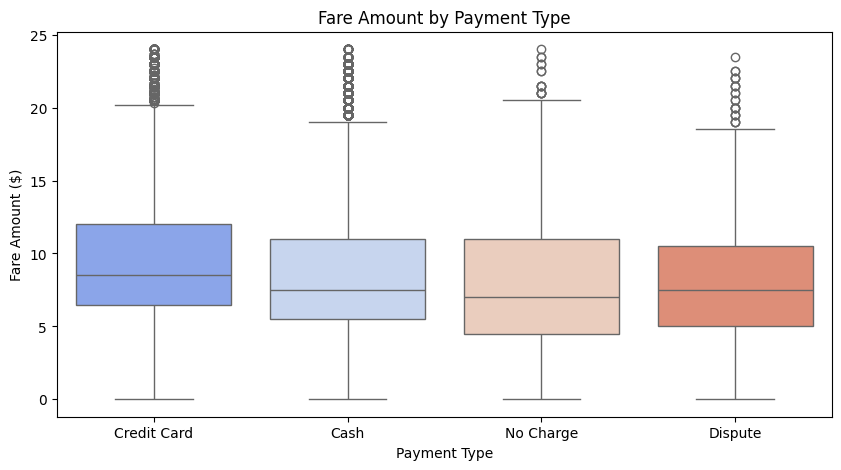

In [33]:
#13
plt.figure(figsize=(10,5))
sns.boxplot(x=df['payment_type'], y=df['fare_amount'], palette='coolwarm')
plt.title('Fare Amount by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Fare Amount ($)')
plt.show()